<a href="https://colab.research.google.com/github/chain13567/-Project-Collection1/blob/main/python%E6%99%BA%E6%85%A7%E9%86%AB%E7%99%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://l.facebook.com/l.php?u=https%3A%2F%2Fwww.mdpi.com%2F2077-0383%2F10%2F13%2F2901%3Ffbclid%3DIwAR0S7i7m6b4f8jjBDQoug65dMmAb0m37FtEUtBiT8JAtHTlEvJBwyAaitGo&h=AT1xyJmqeqsa7lLgt8t6WLCEvs1Zhd_EuR1n4JdMj_tEFvVnST-zMhpDnvj2RZq3t-8zUYruu2tpBCKt8QmSUai8J1wBfJ9pNsOJ5ydD6jBpVx6yTJ2Cb6Mw3lmBW5pR3M8IMAJ56spUwQy5m5BHqDwv&__tn__=%2CmH-R&c[0]=AT0kYxv92jVXX-0z2eWDwhra8RP0gUpglX3hlMEDieN2CPA2dzPHOc6AKu3zQGWbnDCBrhC_0rxfX4wprK1Z2TI-5z4H2tK-m5RImRVnqjrW_ixU1uyHM1ufgZS5u82BlX-64OKvzWyo7FScBCJ1sjfcQxkiiP2XO53VN4qFDv4_Hwak6hSNlj0fPjpXr70sjqGM7U6NgHmlUZxm-g

In [ ]:
#讀取檔案
import pandas as pd
#切割檔案
from sklearn.model_selection import train_test_split
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#Roc
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report
#繪圖
import matplotlib.pyplot as plt 
#numpy做存檔用
import numpy as np
#lightgbm
import lightgbm as lgb
#xgboost
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/抽血報告.csv',encoding='Big5')
df

,age,sex,data1,data2,data3,data4,data5,data6,data7,data8,...,data28,data29,data30,data31,data32,data33,data34,data35,data36,y
0,64,1,19,0.0,2,3,2,5,1,2,...,0,0,0,0,0,1,16,0,0,0
1,79,2,19,18.0,6,10,4,10,2,5,...,0,0,0,0,0,1,2,1,2,1
2,73,2,7,23.0,7,9,7,12,2,6,...,0,0,0,1,0,2,2,0,0,1
3,73,2,19,12.0,4,5,2,7,1,3,...,0,0,0,0,0,1,15,0,0,0
4,59,2,24,14.0,4,5,3,6,1,3,...,0,0,0,0,0,1,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,78,1,19,6.0,2,2,0,6,0,1,...,0,0,0,0,0,1,8,0,0,0
498,64,1,16,5.0,6,7,4,7,1,4,...,0,0,0,0,0,1,9,0,0,0
499,65,1,19,3.0,3,2,2,7,0,1,...,0,0,0,0,0,1,17,0,0,0
500,77,2,21,3.0,2,3,0,6,0,0,...,0,1,0,0,0,1,8,0,0,0


# 查看遺失值

In [ ]:
mis_val_percent = 100 * df.isnull().sum() / len(df)

In [ ]:
lose_data = pd.DataFrame()
lose_data_per = pd.DataFrame()
lose_data["id"] = df.columns
lose_data_per["per"] = list(mis_val_percent)
lost_dat=pd.concat([lose_data, lose_data_per], axis=1)
print(lost_dat)

        id       per
0      age  0.000000
1      sex  0.000000
2    data1  0.000000
3    data2  0.398406
4    data3  0.000000
5    data4  0.000000
6    data5  0.000000
7    data6  0.000000
8    data7  0.000000
9    data8  0.000000
10   data9  0.000000
11  data10  0.000000
12  data11  0.000000
13  data12  0.000000
14  data13  0.000000
15  data14  0.000000
16  data15  0.000000
17  data16  0.000000
18  data17  0.000000
19  data18  0.000000
20  data19  0.000000
21  data20  0.000000
22  data21  0.000000
23  data22  0.000000
24  data23  0.000000
25  data24  0.000000
26  data25  0.000000
27  data26  0.000000
28  data27  0.000000
29  data28  0.000000
30  data29  0.000000
31  data30  0.000000
32  data31  0.000000
33  data32  0.000000
34  data33  0.000000
35  data34  0.000000
36  data35  0.000000
37  data36  0.000000
38       y  0.000000


In [ ]:
df['data2'] = df.data2.fillna(df.data2.median())

0:代表正常 1:代表有病

0    406
1     96
Name: y, dtype: int64


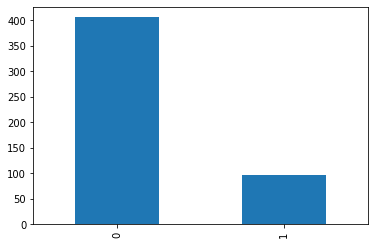

In [ ]:
count_classes = pd.value_counts(df['y'], sort=True).sort_index()
count_classes.plot(kind='bar') 
print(count_classes)

In [ ]:
data1 = df.drop(["y"], axis=1) #剔除 y
X = data1 
y = df.y #選擇 y
y.dtypes

dtype('int64')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 羅吉斯迴歸

In [ ]:
lg = LogisticRegression(C=0.01,solver = 'sag')
lg.fit(X_train,y_train)
y_score = lg.fit(X_train,y_train).decision_function(X_test)
#print('在測試數據集上的預測準確率: {:.2f}'.format(lg.score(X_test, y_test)))
print ("\n\n ---邏輯回歸---")
lg_roc_auc = roc_auc_score(y_test,  lg.predict_proba(X_test)[:,1])
print ("羅吉斯迴歸 AUC = %2.2f" % lg_roc_auc)
print(classification_report(y_test, lg.predict(X_test)))



 ---邏輯回歸---
羅吉斯迴歸 AUC = 0.83
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       205
           1       0.59      0.28      0.38        46

    accuracy                           0.83       251
   macro avg       0.72      0.62      0.64       251
weighted avg       0.81      0.83      0.81       251



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


AUC

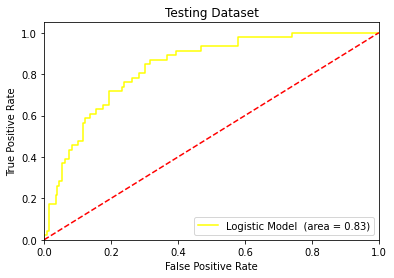

In [ ]:
fprl_gnb, tprl_gnb, thresholdsl_gnb = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprl_gnb, tprl_gnb, color = 'yellow',label='Logistic Model  (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Dataset')
plt.legend(loc="lower right")
plt.show()

# xgboost

In [ ]:
xgb = XGBClassifier(
    #深度
    max_depth=3, 
    #疊帶次數
    n_estimators=200,
    #學習數率
    learn_rate=0.01)
xgb.fit(X_train,y_train)
#print('在測試數據集上的預測準確率: {:.2f}'.format(xgb.score(X_test,y_test)))
print ("\n\n ---xgboost---")
xgb_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
print ("xgboost AUC = %2.2f" % xgb_roc_auc)
print(classification_report(y_test, xgb.predict(X_test)))



 ---xgboost---
xgboost AUC = 0.86
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       205
           1       0.60      0.52      0.56        46

    accuracy                           0.85       251
   macro avg       0.75      0.72      0.73       251
weighted avg       0.84      0.85      0.84       251



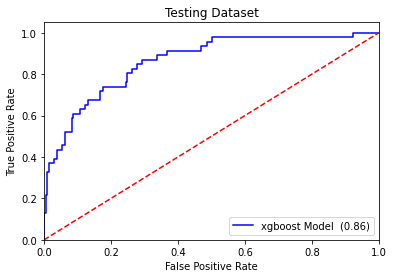

In [ ]:
fprl_gnb_xg, tprl_gnb_xg, thresholdsl_gnb_xg = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprl_gnb_xg, tprl_gnb_xg, color = 'blue',label='xgboost Model  (%0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Dataset')
plt.legend(loc="lower right")
plt.show()

# 隨機森林

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
#print('在測試數據集上的預測準確率: {:.2f}'.format(rf_clf.score(X_test,y_test)))
print ("\n\n ---隨機森林---")
rf_clf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])
print ("隨機森林 AUC = %2.2f" % rf_clf_roc_auc)
print(classification_report(y_test, rf_clf.predict(X_test)))



 ---隨機森林---
隨機森林 AUC = 0.87
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       205
           1       0.78      0.46      0.58        46

    accuracy                           0.88       251
   macro avg       0.83      0.71      0.75       251
weighted avg       0.87      0.88      0.86       251



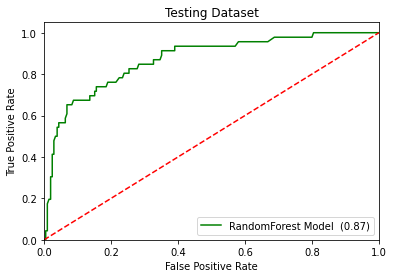

In [ ]:
fprl_gnb_rf, tprl_gnb_rf, thresholdsl_gnb_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprl_gnb_rf, tprl_gnb_rf, color = 'green',label='RandomForest Model  (%0.2f)' % rf_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Dataset')
plt.legend(loc="lower right")
plt.show()

# 決策樹

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(tree_clf.score(X_test,y_test)))
print ("\n\n ---決策樹---")
tree_clf_roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:,1])
print ("決策樹 AUC = %2.2f" % tree_clf_roc_auc)
print(classification_report(y_test, tree_clf.predict(X_test)))

在測試數據集上的預測準確率: 0.83


 ---決策樹---
決策樹 AUC = 0.73
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       205
           1       0.53      0.57      0.55        46

    accuracy                           0.83       251
   macro avg       0.72      0.73      0.72       251
weighted avg       0.83      0.83      0.83       251



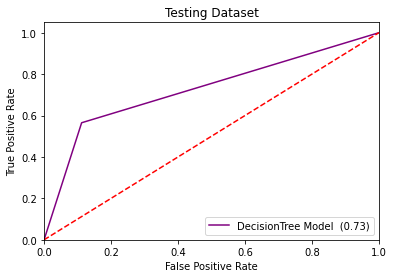

In [ ]:
fprl_gnb_tree, tprl_gnb_tree, thresholdsl_gnb_tree = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprl_gnb_tree, tprl_gnb_tree, color = 'purple',label='DecisionTree Model  (%0.2f)' % tree_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Dataset')
plt.legend(loc="lower right")
plt.show()

# lightgbm

In [ ]:
gbm = lgb.LGBMClassifier(objective = 'binary',learning_rate = 0.05,n_estimators = 100,random_state=0)
gbm.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(gbm.score(X_test,y_test)))
print ("\n\n ---lightgbm---")
gbm_clf_roc_auc = roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1])
print ("lightgbm AUC = %2.2f" % gbm_clf_roc_auc)
print(classification_report(y_test, gbm.predict(X_test)))

在測試數據集上的預測準確率: 0.86


 ---lightgbm---
lightgbm AUC = 0.86
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       205
           1       0.67      0.52      0.59        46

    accuracy                           0.86       251
   macro avg       0.78      0.73      0.75       251
weighted avg       0.86      0.86      0.86       251



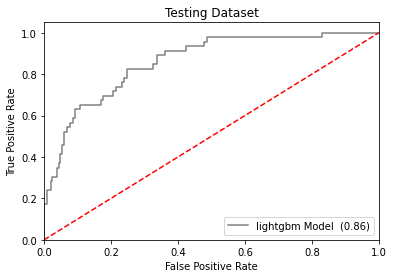

In [ ]:
fprl_gnb_gbm, tprl_gnb_gbm, thresholdsl_gnb_gbm = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprl_gnb_gbm, tprl_gnb_gbm, color = 'Gray',label='lightgbm Model  (%0.2f)' % gbm_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Dataset')
plt.legend(loc="lower right")
plt.show()

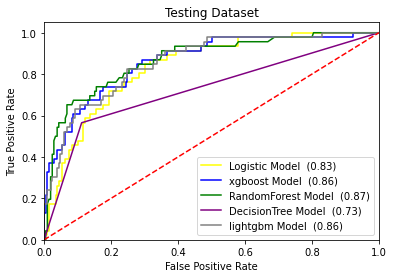

In [ ]:
fprl_gnb_lg, tprl_gnb_lg, thresholdsl_gnb_lg = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
fprl_gnb_xg, tprl_gnb_xg, thresholdsl_gnb_xg = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
fprl_gnb_rf, tprl_gnb_rf, thresholdsl_gnb_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
fprl_gnb_tree, tprl_gnb_tree, thresholdsl_gnb_tree = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
fprl_gnb_gbm, tprl_gnb_gbm, thresholdsl_gnb_gbm = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fprl_gnb_lg, tprl_gnb_lg, color = 'yellow',label='Logistic Model  (%0.2f)' % lg_roc_auc)
plt.plot(fprl_gnb_xg, tprl_gnb_xg, color = 'blue',label='xgboost Model  (%0.2f)' % xgb_roc_auc)
plt.plot(fprl_gnb_rf, tprl_gnb_rf, color = 'green',label='RandomForest Model  (%0.2f)' % rf_clf_roc_auc)
plt.plot(fprl_gnb_tree, tprl_gnb_tree, color = 'purple',label='DecisionTree Model  (%0.2f)' % tree_clf_roc_auc)
plt.plot(fprl_gnb_gbm, tprl_gnb_gbm, color = 'Gray',label='lightgbm Model  (%0.2f)' % gbm_clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Dataset')
plt.legend(loc="lower right")
plt.show()